In [2]:
# Data Exploration
# Libraries needed:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Takes the csv file and converts it into a dataframe
df = pd.read_csv('/Users/dimitrishort/Documents/DataMiningFinal/ProcessedMovieData.csv')

# Displays the first few rows of the dataframe 
df.head()

,userId,movieId,rating,title,genres,datetime,year,month,day,dayofweek,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,1,0.777778,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03,2000,7,30,6,...,0,0,0,0,0,0,0,0,0,1995.0
1,5,1,0.777778,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1996-11-08 06:36:02,1996,11,8,4,...,0,0,0,0,0,0,0,0,0,1995.0
2,7,1,0.888889,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2005-01-25 06:52:26,2005,1,25,1,...,0,0,0,0,0,0,0,0,0,1995.0
3,15,1,0.444444,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2017-11-13 12:59:30,2017,11,13,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,17,1,0.888889,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2011-05-18 05:28:03,2011,5,18,2,...,0,0,0,0,0,0,0,0,0,1995.0


In [4]:
rating_stats = df['rating'].describe() # Describes the data from the ratings column

# Prints the description of the rating column
print(rating_stats)

'''
The average ratings over the 100k entries is about 66% 
'''

count    100836.000000
mean          0.667013
std           0.231673
min           0.000000
25%           0.555556
50%           0.666667
75%           0.777778
max           1.000000
Name: rating, dtype: float64


'\nThe average ratings over the 100k entries is about 66% \n'

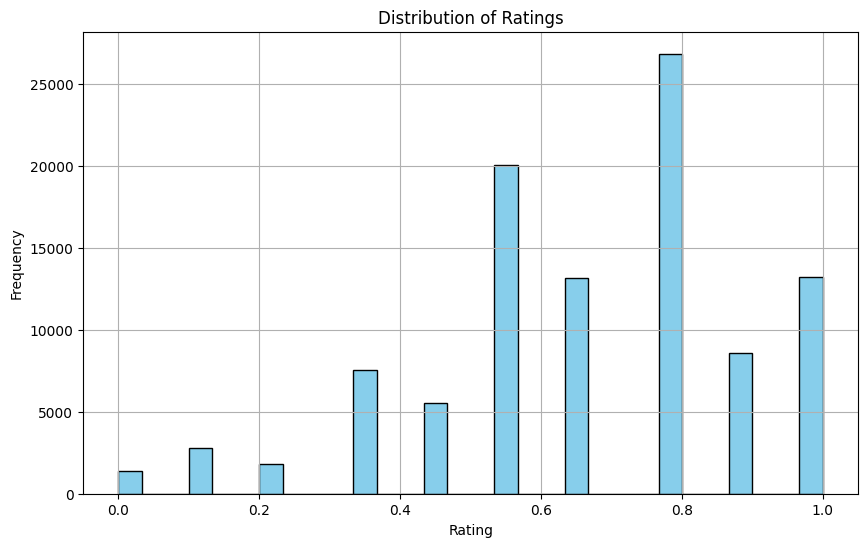

"\nThis chart shows that the most common rating by a decent amount is roughly 30,000\nbased on the data. It's also seen that there are higher ratings over .5 than lower \nwhich can claim that most people don't entirely dislike the movie or at worst think\nit's average. \n"

In [5]:
# Plots the distribution of ratings 
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

'''
This chart shows that the most common rating by a decent amount is roughly 30,000
based on the data. It's also seen that there are higher ratings over .5 than lower 
which can claim that most people don't entirely dislike the movie or at worst think
it's average. 
'''

In [6]:
# Calculates the mean and count of ratings for each movie, grouping the movies together
movie_ratings = df.groupby('title').agg({'rating': ['mean', 'count']})

# Renames columns to the average rating and count of ratings
movie_ratings.columns = ['rating_mean', 'rating_count']

# Ensures only movies with more than 50 ratings, sorting them in descending order
movie_ratings_sorted_by_mean = movie_ratings[movie_ratings['rating_count'] > 50].sort_values(by='rating_mean', ascending=False)

# Sorts all the movies by the amount of ratings they have in descending order 
movie_ratings_sorted_by_count = movie_ratings.sort_values(by='rating_count', ascending=False)

# Displays the top 10 movies by average rating and by count
top_movies_by_count = movie_ratings_sorted_by_count.head(15)
top_movies_by_count

'''
This shows that movies such as Forrest Gump and Pulp Fiction are popular
and that most people like this movie but also has examples pointing to 
movies such as Jurassic Park and Fight Club which are still generally 
popular but have more mixed reviews overall
'''

'\nThis shows that movies such as Forrest Gump and Pulp Fiction are popular\nand that most people like this movie but also has examples pointing to \nmovies such as Jurassic Park and Fight Club which are still generally \npopular but have more mixed reviews overall\n'

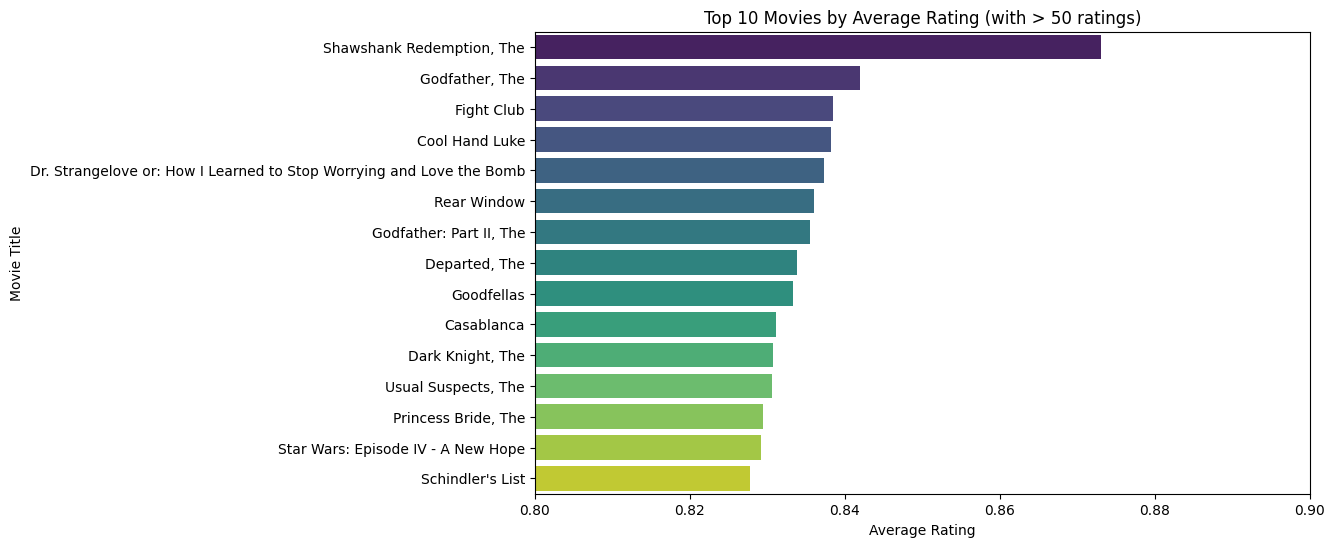

'\nThis plot shows the highest rating movies greater than 50 reviews. This tells us that \nthe highest rated movie is Shawshank Redemption from the dataset with the over following \nbelow it.\n'

In [7]:
# Plotting the top 15 movies by average rating
top_movies_by_mean = movie_ratings_sorted_by_mean.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_by_mean['rating_mean'], y=top_movies_by_mean.index, palette="viridis")
plt.title('Top 10 Movies by Average Rating (with > 50 ratings)')
plt.xlabel('Average Rating')
plt.xlim(0.8, 0.9) 
plt.ylabel('Movie Title')
plt.show()

'''
This plot shows the highest rating movies greater than 50 reviews. This tells us that 
the highest rated movie is Shawshank Redemption from the dataset with the over following 
below it.
'''

In [8]:
# Gets a list of genre's to be extracted from the dataframe 
genre_columns = [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Groups the userID and values from the genre_columns for each genrea
user_genre_preferences = df.groupby('userId')[genre_columns].sum()

# Display the first few rows to check the data
print(user_genre_preferences.head())

'''
This just shows which genres are the most popular among the dataset
with action having a lot of ratings but documentary has little to none
'''

        Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
userId                                                                       
1           90         85         29        42      83     45            0   
2           11          3          0         0       7     10            3   
3           14         11          4         5       9      2            0   
4           25         29          6        10     104     27            2   
5            9          8          6         9      15     12            0   

        Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  Mystery  Romance  \
userId                                                                       
1          68       47          1      17     0       22       18       26   
2          17        0          0       1     4        0        2        1   
3          16        4          0       8     0        1        1        5   
4         120       19          4       4     1       16       

'\nThis just shows which genres are the most popular among the dataset\nwith action having a lot of ratings but documentary has little to none\n'

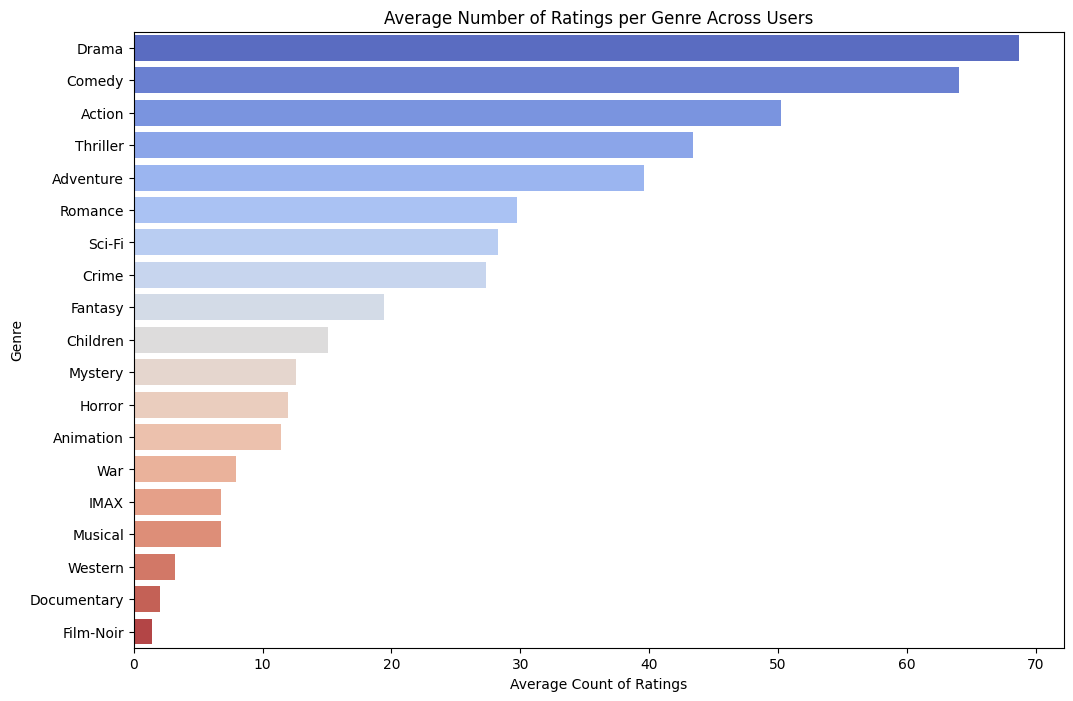

'\nThis shows that the most popular genres are Drama, Comedy, \nand Action while the least popular are Documentary, Film-Noir,\nand Western. \n'

In [9]:
# Calculate mean ratings per genre across all users
genre_means = user_genre_preferences.mean().sort_values(ascending=False)

# Defines the figure size
plt.figure(figsize=(12, 8))

# Creates the barplot 
sns.barplot(x=genre_means.values, y=genre_means.index, palette='coolwarm')
plt.title('Average Number of Ratings per Genre Across Users')
plt.xlabel('Average Count of Ratings')
plt.ylabel('Genre')
plt.show() # Displays the barplot 

'''
This shows that the most popular genres are Drama, Comedy, 
and Action while the least popular are Documentary, Film-Noir,
and Western. 
'''

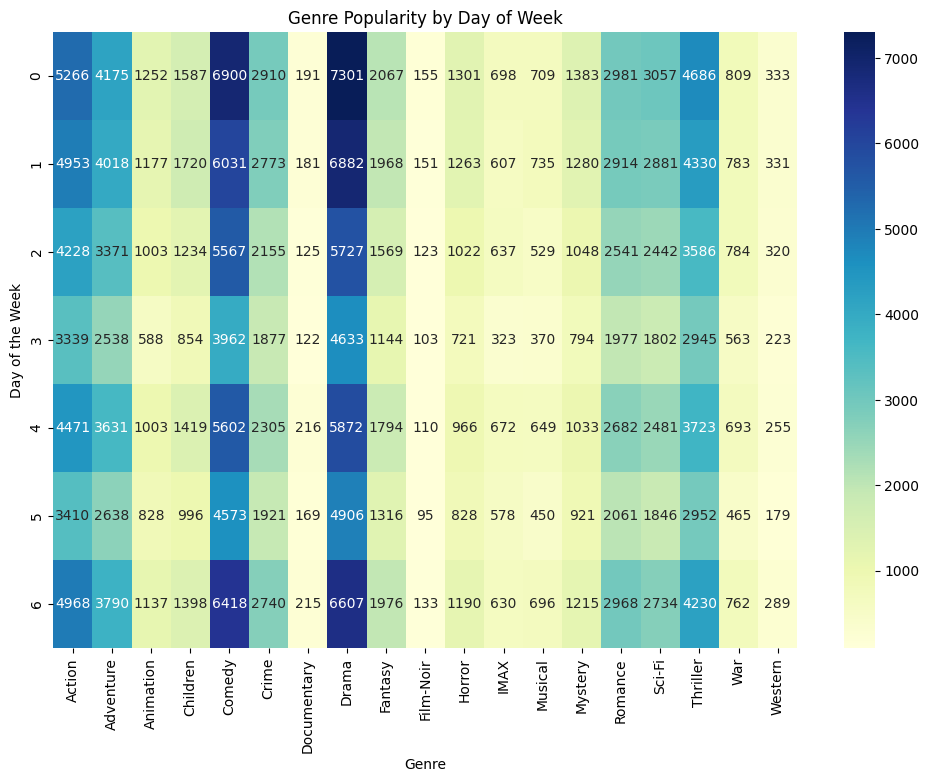

"\nThis chart shows that the Drama, Comedy, Action and Thriller\nare fairly popular throughout the week while all the others aren't as popular \n"

In [10]:
# Selects each column of the genres to be the genre_columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Groups the genre's by day of the week 
genre_by_day = df.groupby('dayofweek')[genre_columns].sum()

# Plots the heatmap of what genres are popular during the week 
plt.figure(figsize=(12, 8))
sns.heatmap(genre_by_day, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Genre Popularity by Day of Week')
plt.xlabel('Genre')
plt.ylabel('Day of the Week')
plt.show()

'''
This chart shows that the Drama, Comedy, Action and Thriller
are fairly popular throughout the week while all the others aren't as popular 
'''

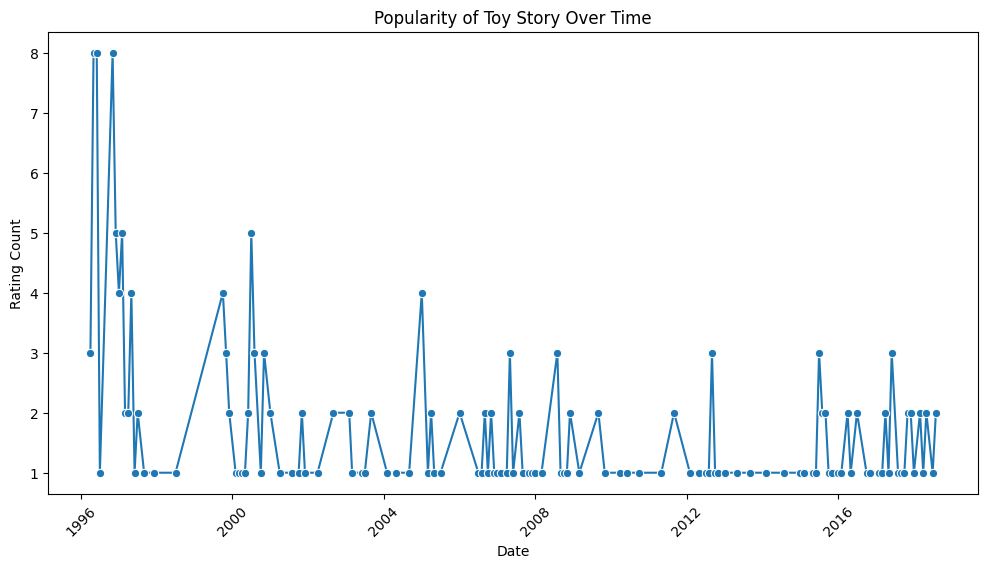

'\nFor this plot it shows that Toy Story was popular \noriginally when it was released then popularity \nhas dropped overtime. Adjust movie to see different popularites\n'

In [11]:
specific_movie = 'Toy Story' # Defines the specific movie to check

# Analyzes the movie rating over time showcasing the the popularity of it 
movie_ratings_over_time = df[df['title'] == specific_movie].groupby(['year', 'month']).size().reset_index(name='count')

# Defines and displays the chart 
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_ratings_over_time, x=pd.to_datetime(movie_ratings_over_time[['year', 'month']].assign(day=1)), y='count', marker='o')
plt.title(f'Popularity of {specific_movie} Over Time')
plt.xlabel('Date')
plt.ylabel('Rating Count')
plt.xticks(rotation=45)
plt.show()

'''
For this plot it shows that Toy Story was popular 
originally when it was released then popularity 
has dropped overtime. Adjust movie to see different popularites
'''

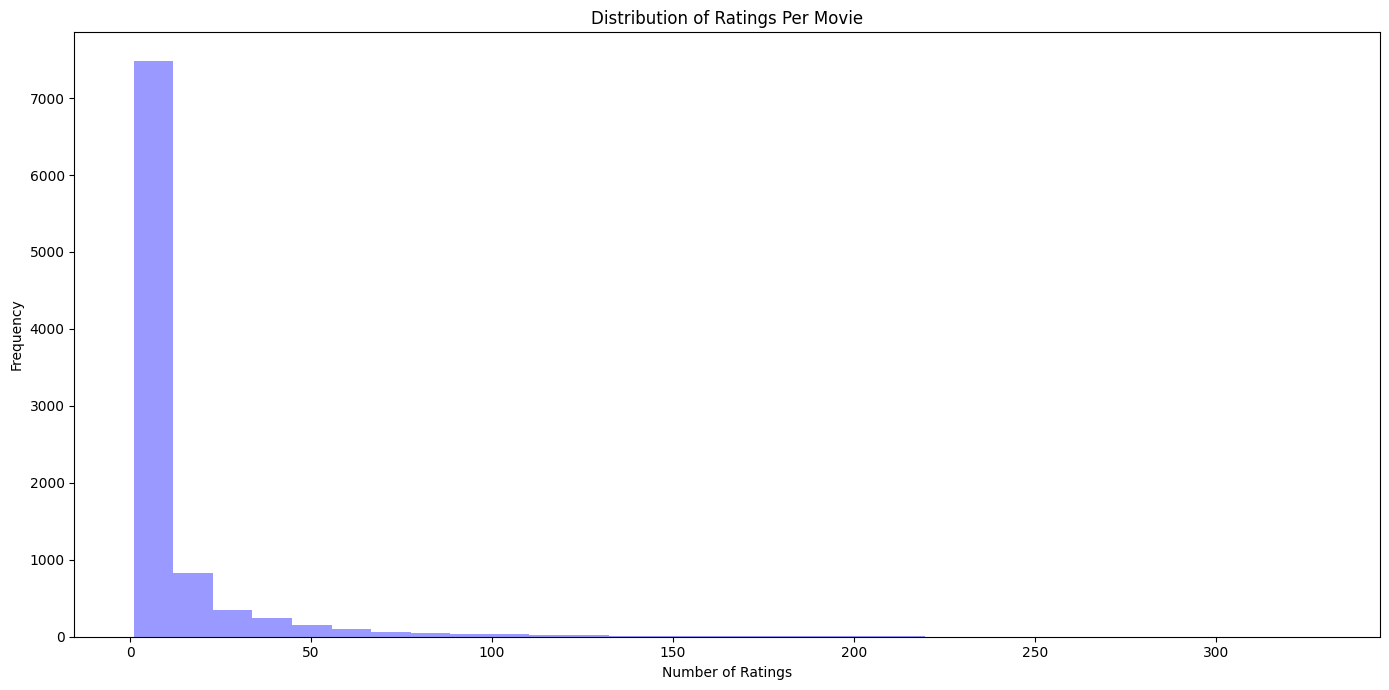

'\nThis chart shows that alot of movies have 25-30 ratings \nand after that it tends to drop off a good amount.\n'

In [12]:
# Calculates the amount of ratings for each movie
ratings_per_movie = df.groupby('title')['rating'].count()

# Calculates the amount of ratings for each person
ratings_per_user = df.groupby('userId')['rating'].count()

# Defines the figure size
plt.figure(figsize=(14, 7))

# Creates a plot for the distribution of ratings per movie
sns.distplot(ratings_per_movie, bins=30, kde=False, color='blue')
plt.title('Distribution of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
# Displays the chart 
plt.tight_layout()
plt.show()

'''
This chart shows that alot of movies have 25-30 ratings 
and after that it tends to drop off a good amount.
'''

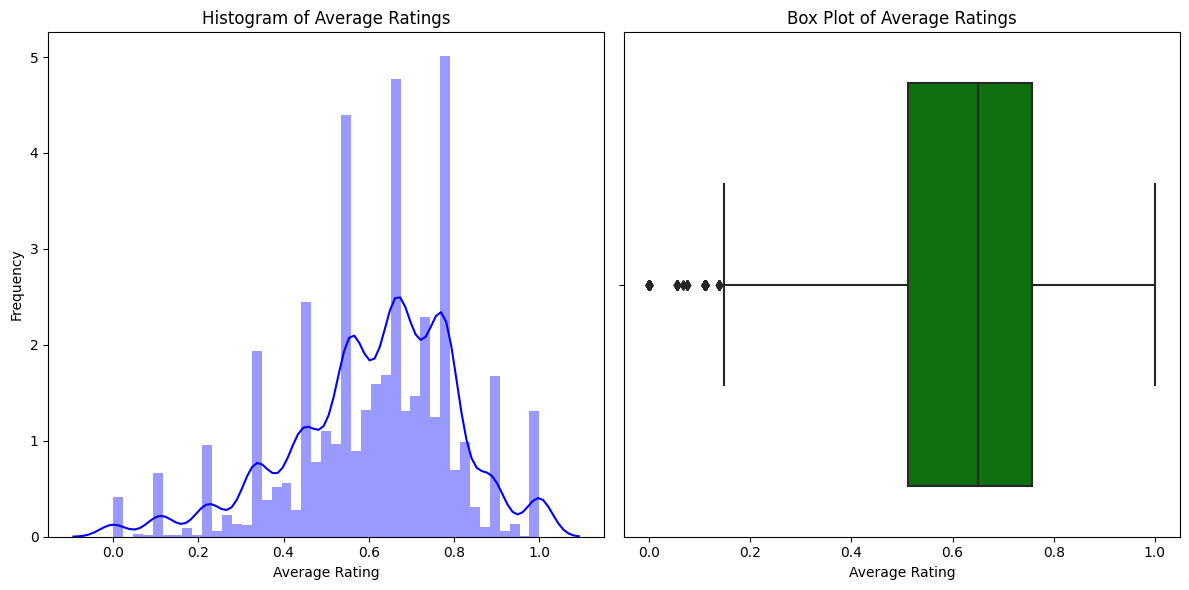

'\nThis chart shows that, similarly to before the \naverage ratings are around 0.7-0.8 stating\nthat most people enjoyed the movie.\n\nThe box plot also supports this but also highlights\nthe outliers for people who strongly disliked the movie. \n'

In [13]:
# Calculates the average rating for each movie 
average_ratings = df.groupby('title')['rating'].mean()

# Defines the figure size
plt.figure(figsize=(12, 6))

# Creats a subplot (histplot) for the distribution of average ratings per movie 
plt.subplot(1, 2, 1)  
sns.distplot(average_ratings, kde=True, color='blue')
plt.title('Histogram of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Creates a subplot (boxplot) for the distribution of average ratings per movie
plt.subplot(1, 2, 2)  
sns.boxplot(x=average_ratings, color='green')
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')

# Displays the chart 
plt.tight_layout()
plt.show()

'''
This chart shows that, similarly to before the 
average ratings are around 0.7-0.8 stating
that most people enjoyed the movie.

The box plot also supports this but also highlights
the outliers for people who strongly disliked the movie. 
'''

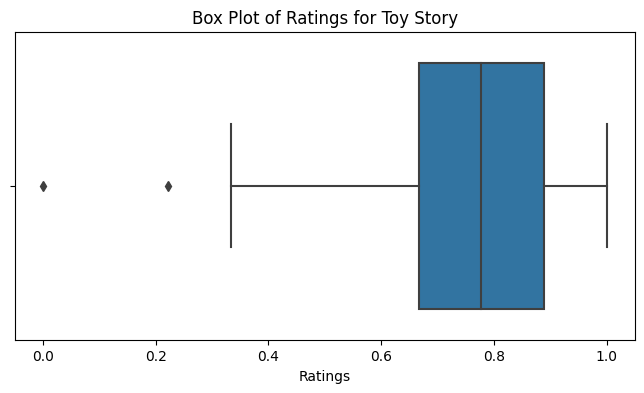

"\nUsing Toy Story as an example, the boxplot shows \nthet the average rating is right below 0.8 \nmeaning that most people liked the movie but there\nare some ratings by 0-0.4 which state those people\ndidn't like the movie.\n"

In [14]:
movie_title = 'Toy Story' # Defines the movie to review ratings for 

# Gets the movie from the dataframe 
data = df[df['title'] == movie_title]
        
# Creates the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['rating'])
plt.title(f'Box Plot of Ratings for {movie_title}')
plt.xlabel('Ratings')
plt.show() # Displays the plot 

'''
Using Toy Story as an example, the boxplot shows 
thet the average rating is right below 0.8 
meaning that most people liked the movie but there
are some ratings by 0-0.4 which state those people
didn't like the movie.
'''

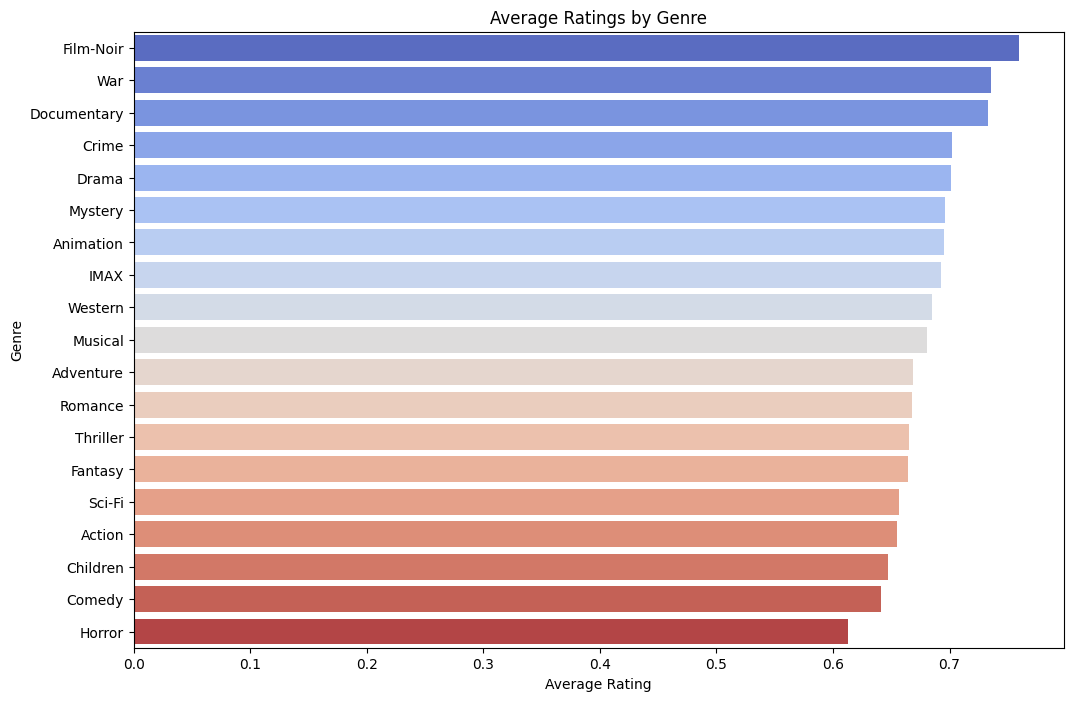

'\nThis chart shows that genres such as Film-Noir and War \nhave on average the highest ratings. While they may not be \npopular, this indicates that the people who watch these movies \nlike them a lot. \n'

In [15]:
# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate the average rating for each genre
genre_averages = {}
for genre in genre_columns:
    # Calculates the genre by the rating and then calculates the mean
    genre_averages[genre] = (df[genre] * df['rating']).sum() / df[genre].sum()

# Converts the results for plotting 
genre_averages_series = pd.Series(genre_averages).sort_values(ascending=False)

# Creates the barplot 
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_averages_series.values, y=genre_averages_series.index, palette='coolwarm')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show() # Displays the plot 


'''
This chart shows that genres such as Film-Noir and War 
have on average the highest ratings. While they may not be 
popular, this indicates that the people who watch these movies 
like them a lot. 
'''

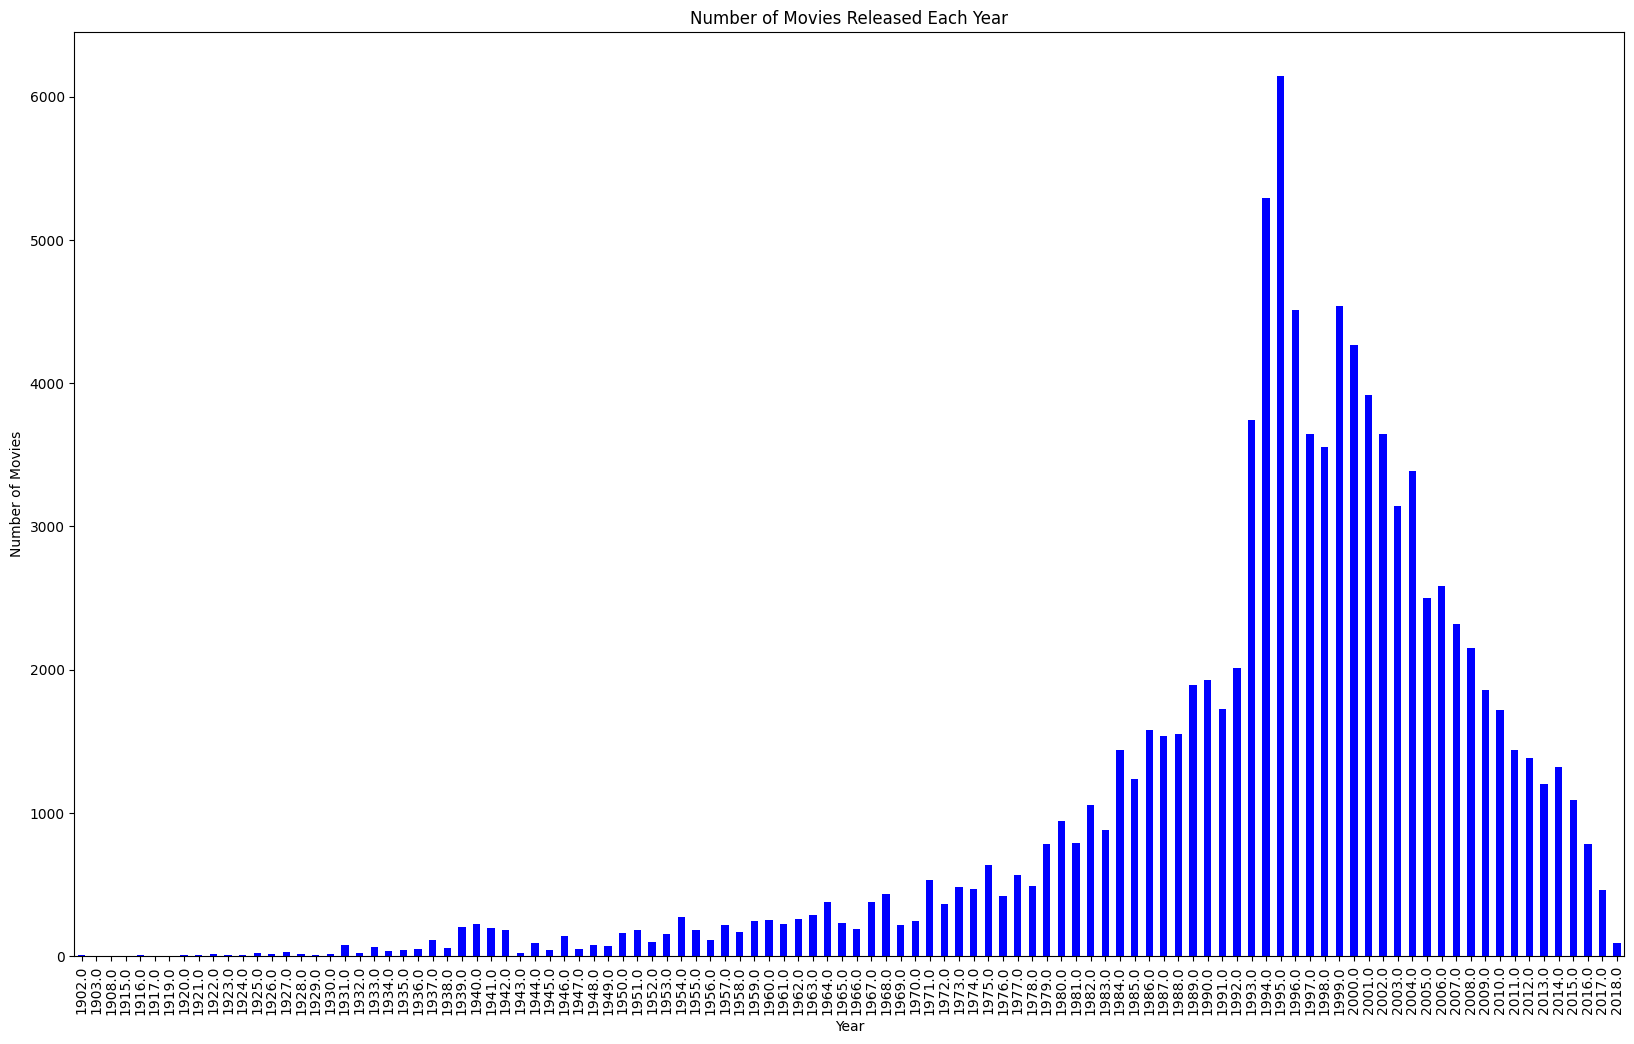

'\nThis chart shows that the most movies were made in 1995 with \nthe amount of movies increasing steadily from about 1970.\n'

In [16]:
# Counts the amount of movies release every year and sorts them
movies_per_year = df['release_year'].value_counts().sort_index()

# Defines the figure size 
plt.figure(figsize=(20, 12))

# Creates a barplot with the number of movies released each year 
movies_per_year.plot(kind='bar', color='blue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

'''
This chart shows that the most movies were made in 1995 with 
the amount of movies increasing steadily from about 1970.
'''

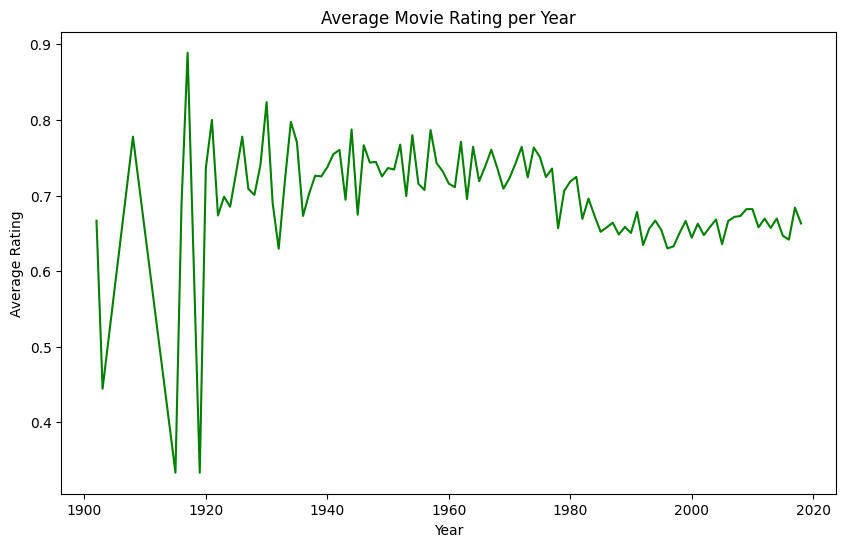

'\nThis chart shows that the average movie rating every year\nvaried a lot in the early 1900s but as movies became \nmore popular appears to have stabilized hovering\naround 0.6 and 0.7. \n'

In [17]:
# Groups the data by the release year and calculates the average rating for each
average_rating_per_year = df.groupby('release_year')['rating'].mean()

# Defines the figure size 
plt.figure(figsize=(10, 6))

# Creates the chart 
average_rating_per_year.plot(color='green')
plt.title('Average Movie Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show() # Displays the chart 

'''
This chart shows that the average movie rating every year
varied a lot in the early 1900s but as movies became 
more popular appears to have stabilized hovering
around 0.6 and 0.7. 
'''

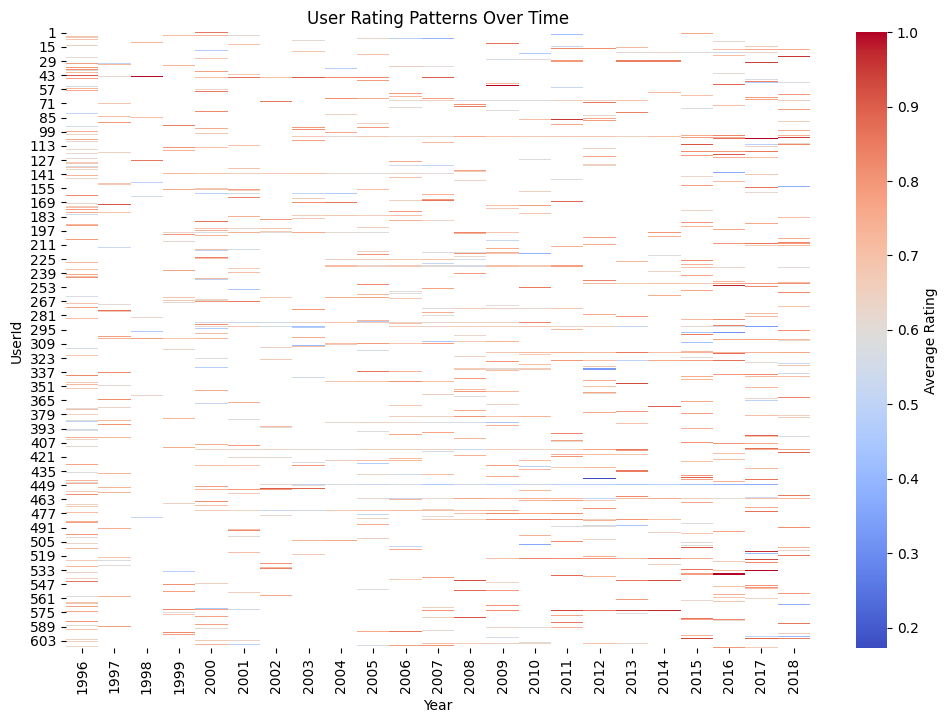

"\nThis heatmap is intended to show the rating patterns\nover time but with the vast data and miniscule changes\nto show on the graph it's tough to analyze but it can\nbe seen that people such as 449 have streaks where\nthey give movies low ratings which can help the model.\n"

In [18]:
# Converts the datetime column to pandas datetime 
df['datetime'] = pd.to_datetime(df['datetime'])

# Groups by userID and year and calculates the average rating 
user_yearly_avg = df.groupby(['userId', df['datetime'].dt.year])['rating'].mean().reset_index()

# Pivots to create a table where each column represents a year and each row represents a user
user_yearly_avg_pivot = user_yearly_avg.pivot(index='userId', columns='datetime', values='rating')

# Defines the figure size
plt.figure(figsize=(12, 8))

# Creates the heatmap chart 
sns.heatmap(user_yearly_avg_pivot, cmap='coolwarm', annot=False, cbar_kws={'label': 'Average Rating'})
plt.title('User Rating Patterns Over Time')
plt.xlabel('Year')
plt.ylabel('UserId')
plt.show() # Displays the chart 

'''
This heatmap is intended to show the rating patterns
over time but with the vast data and miniscule changes
to show on the graph it's tough to analyze but it can
be seen that people such as 449 have streaks where
they give movies low ratings which can help the model.
'''

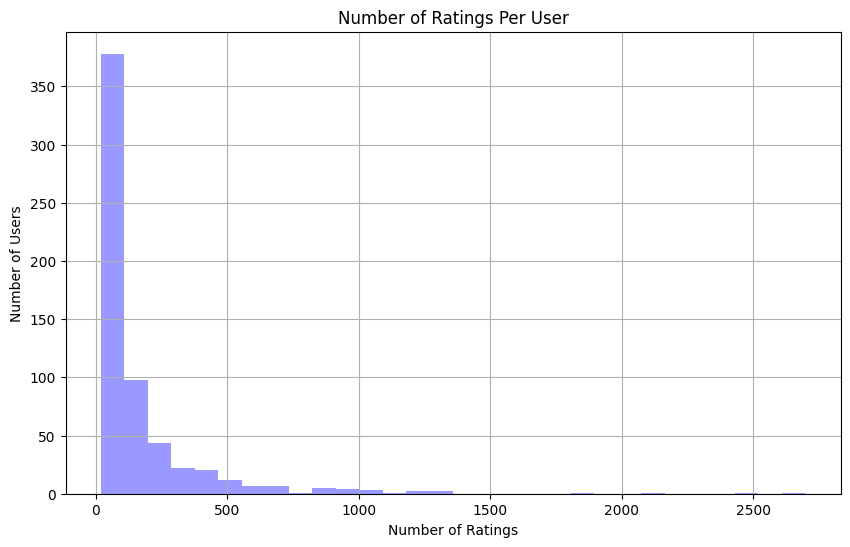

'\nThis chart shows that the number of ratings per\nuser averages 100 or less since after 250 the\namount of ratings drops a good amount. \n'

In [19]:
# Calculates the number of ratings per user
user_rating_counts = df['userId'].value_counts()

# Defines the figure size
plt.figure(figsize=(10, 6))

# Defines the barplot 
sns.distplot(user_rating_counts, bins=30, kde=False, color='blue')
plt.title('Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show() # Displays the chart 

'''
This chart shows that the number of ratings per
user averages 100 or less since after 250 the
amount of ratings drops a good amount. 
'''

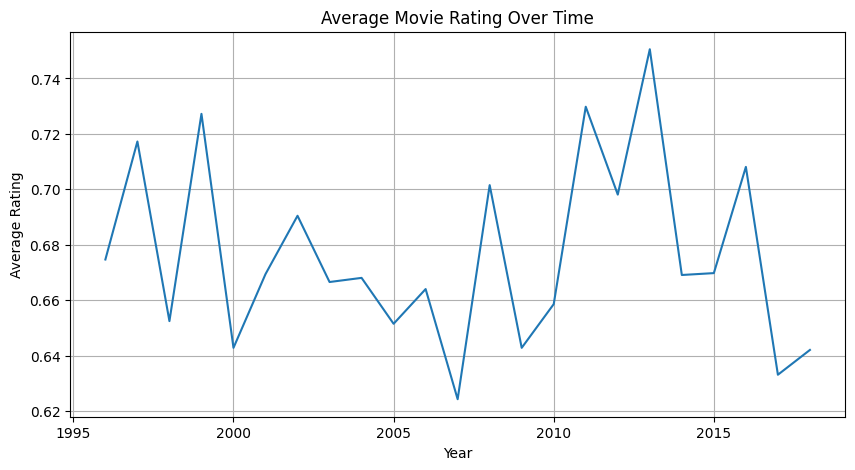

"\nThis chart shows the overall ratings of movies \nchanging overtime showing that certain years such as 2007\nhave low points which may point that movies released \nduring this time don't do as well as other times. \n"

In [20]:
# Groups by year and calculates the average rating
average_rating_over_time = df.groupby(df['datetime'].dt.year)['rating'].mean()

# Defines the figure size 
plt.figure(figsize=(10, 5))

# Creates the chart 
average_rating_over_time.plot(kind='line')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show() # Displays the chart 

'''
This chart shows the overall ratings of movies 
changing overtime showing that certain years such as 2007
have low points which may point that movies released 
during this time don't do as well as other times. 
'''